# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
runSample=False  #set to true to run sample
if (runSample): 
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
if (runSample): env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## implement DDPG policy

### Setup Parameters

This uses a basic structure 'Parameters' to encapsalate all common parameters

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from Parameters import Parameters

p=Parameters()
p.set_defaults()
p.BATCH_SIZE=256
p.STEPS_BEFORE_LEARN=20
p.NUM_LEARN_STEPS=100
p.STATE_SIZE=state_size
p.ACTION_SIZE=action_size
p.NUM_AGENTS=num_agents
p.BUFFER_SIZE=int(1.0e5)
p.LR_ACTOR=.0001
p.LR_CRITIC=.001
p.TAU = 0.06
p.WEIGHT_DECAY=0
p.EPSILON=.99
p.EPSILON_DECAY=.998
p.GAMMA = 0.94
p.NOISE_SIGMA=0.1
p.DEVICE=device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = p.DEVICE

print(p)

Parameters:
STATE_SIZE(0):33
ACTION_SIZE(0):4
NUM_AGENTS(0):20
RANDOM_SEED(1):1
BUFFER_SIZE(ie5):100000
BATCH_SIZE(512):256
STEPS_BEFORE_LEARN(15) :10
NUM_LEARN_STEPS(10):50
GAMMA(.99):0.94
GAMMA_MAX(.99):0.99
GAMMA_DECAY(1.001):1.001
TAU Size(1e-3):0.06
LR_ACTOR(ie-4):0.0001
LR_CRITIC(1e-5):0.001
WEIGHT_DECAY(0):0
DEVICE(cpu):cuda:0
EPSILON(1.0):0.99
EPSILON_MIN(.1) :0.1
EPSILON_DECAY(.995) :0.998
NOISE_SIGMA(0.2):0.1



### Create DDPG Agent

In [8]:
from ddpg_agent import DDPGAgent
agent = DDPGAgent(p)

C:\Users\andy\AppData\Local\conda\conda\envs\deeprl\lib\site-packages\torch\cuda\__init__.py:116: UserWarning: 
    Found GPU1 GeForce GTX 670 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


## Helper Functions

### savePrintScores()

prints progresss and saves network

- in parameters:
    - i_episode     :   current episode
    - save_interval :   how often to save network
    - score_average :   current average of scores
    - scores        :   current scores
    - p             :   parameter object
    




In [39]:

def savePrintScores(i_episode,save_interval,score_average,scores,p):
    print('\rEpisode {}, Average Score: {:.2f}, Std Dev: {:.2f}, Eps: {:.2f}, gam: {:.2f}'\
          .format(i_episode, score_average, np.std(scores), p.EPSILON, p.GAMMA), end="\n")        

    if i_episode % save_interval == 0:
        torch.save(agent.actor_local.state_dict(), 'checkpoints\checkpoint_actor2.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoints\checkpoint_critic2.pth')

    if score_average >= 30.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, score_average))
        if i_episode % save_interval == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoints\optimimum_checkpoint_actor_opt.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoints\optimmum_checkpoint_critic_opt.pth')


### updateLrSteps()

updates Learning Rate and number of steps

- in parameters:
    - i_episode     :   current episode
    - p             :   parameter object
    

In [11]:
def updateLrSteps(i_episode,score_average):
    if i_episode == 20:
        p.STEPS_BEFORE_LEARN=40
        p.NUM_LEARN_STEPS=30
        agent.lr_step()
    if i_episode  == 30:
        p.STEPS_BEFORE_LEARN=50
        p.NUM_LEARN_STEPS=20
        #agent.lr_step()
    if  i_episode == 40:
        p.STEPS_BEFORE_LEARN=80
        p.NUM_LEARN_STEPS=10
        #agent.lr_step()
    if i_episode == 4000:
        p.STEPS_BEFORE_LEARN=30
        p.NUM_LEARN_STEPS=10
        #agent.lr_step()
    if i_episode == 4500:
        p.STEPS_BEFORE_LEARN=40
        p.NUM_LEARN_STEPS=10
        #agent.lr_step()
    if score_average > 30.:
        p.STEPS_BEFORE_LEARN=10
        p.NUM_LEARN_STEPS=10

### Train Agent DDPG

In [12]:
from collections import deque

average_period=100
scores_deque = deque(maxlen=average_period)
scores_global = []
average_global = []

p.STEPS_BEFORE_LEARN=20
p.NUM_LEARN_STEPS=100


def ddpg(n_episodes=1000,save_interval=10):
        
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        prev_states=states
        agent.reset()
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        score_average = 0

        while(True):
            actions = agent.act(prev_states,states, add_noise=True)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if any episode finished
            agent.step(prev_states, states, actions, rewards, next_states, dones) # take a step using agent
            prev_states = states
            states = next_states                               # roll over states to next time step
            scores += rewards                                  # update the score (for each agent)
            if np.any(dones):                                  # exit loop if episode finished
                break
                
        score = np.mean(scores)
        scores_deque.append(score)
        score_average = np.mean(scores_deque)
        scores_global.append(score)
        average_global.append(score_average)
        
        updateLrSteps(i_episode,score_average)

        p.EPSILON = max(p.EPSILON * p.EPSILON_DECAY,p.EPSILON_MIN)
        p.GAMMA = min(p.GAMMA_MAX,p.GAMMA*p.GAMMA_DECAY)
        
        savePrintScores(i_episode,save_interval,score_average,scores,p)
        
        if score_average >=40.0: 
                break

    return scores_global, average_global

scores, averages = ddpg()


Episode 1, Average Score: 1.77, Std Dev: 1.07, Eps: 0.99, gam: 0.94
Episode 2, Average Score: 2.20, Std Dev: 0.84, Eps: 0.99, gam: 0.94
Episode 3, Average Score: 3.27, Std Dev: 1.59, Eps: 0.98, gam: 0.94
Episode 4, Average Score: 3.99, Std Dev: 2.83, Eps: 0.98, gam: 0.94
Episode 5, Average Score: 4.76, Std Dev: 3.02, Eps: 0.98, gam: 0.94
Episode 6, Average Score: 5.47, Std Dev: 1.67, Eps: 0.98, gam: 0.95
Episode 7, Average Score: 6.37, Std Dev: 2.94, Eps: 0.98, gam: 0.95
Episode 8, Average Score: 7.41, Std Dev: 3.98, Eps: 0.97, gam: 0.95
Episode 9, Average Score: 8.81, Std Dev: 3.35, Eps: 0.97, gam: 0.95
Episode 10, Average Score: 10.28, Std Dev: 4.99, Eps: 0.97, gam: 0.95
Episode 11, Average Score: 11.86, Std Dev: 2.91, Eps: 0.97, gam: 0.95
Episode 12, Average Score: 13.61, Std Dev: 3.70, Eps: 0.97, gam: 0.95
Episode 13, Average Score: 15.49, Std Dev: 1.77, Eps: 0.96, gam: 0.95
Episode 14, Average Score: 17.10, Std Dev: 1.65, Eps: 0.96, gam: 0.95
Episode 15, Average Score: 18.52, Std 

Episode 113, Average Score: 32.01, Std Dev: 5.04, Eps: 0.79, gam: 0.99
Episode 114, Average Score: 32.03, Std Dev: 3.04, Eps: 0.79, gam: 0.99
Episode 115, Average Score: 32.07, Std Dev: 2.34, Eps: 0.79, gam: 0.99
Episode 116, Average Score: 32.11, Std Dev: 2.48, Eps: 0.78, gam: 0.99
Episode 117, Average Score: 32.15, Std Dev: 3.31, Eps: 0.78, gam: 0.99
Episode 118, Average Score: 32.17, Std Dev: 2.63, Eps: 0.78, gam: 0.99
Episode 119, Average Score: 32.17, Std Dev: 4.68, Eps: 0.78, gam: 0.99
Episode 120, Average Score: 32.08, Std Dev: 8.64, Eps: 0.78, gam: 0.99

Environment solved in 120 episodes!	Average Score: 32.08
Episode 121, Average Score: 32.03, Std Dev: 5.14, Eps: 0.78, gam: 0.99
Episode 122, Average Score: 32.03, Std Dev: 7.13, Eps: 0.78, gam: 0.99
Episode 123, Average Score: 32.03, Std Dev: 4.84, Eps: 0.77, gam: 0.99
Episode 124, Average Score: 32.08, Std Dev: 1.66, Eps: 0.77, gam: 0.99
Episode 125, Average Score: 32.12, Std Dev: 0.95, Eps: 0.77, gam: 0.99
Episode 126, Averag

Episode 221, Average Score: 32.44, Std Dev: 4.98, Eps: 0.64, gam: 0.99
Episode 222, Average Score: 32.47, Std Dev: 2.95, Eps: 0.63, gam: 0.99
Episode 223, Average Score: 32.50, Std Dev: 0.67, Eps: 0.63, gam: 0.99
Episode 224, Average Score: 32.51, Std Dev: 1.65, Eps: 0.63, gam: 0.99
Episode 225, Average Score: 32.51, Std Dev: 4.07, Eps: 0.63, gam: 0.99
Episode 226, Average Score: 32.51, Std Dev: 5.67, Eps: 0.63, gam: 0.99
Episode 227, Average Score: 32.50, Std Dev: 5.19, Eps: 0.63, gam: 0.99


KeyboardInterrupt: 

### Save latest checkpoints

In [62]:
torch.save(agent.actor_local.state_dict(), 'checkpoints\optimum_checkpoint_actor.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoints\optimum_checkpoint_critic.pth')

### Plot Training Results

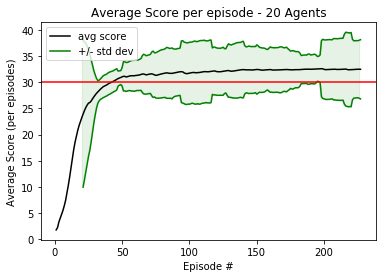

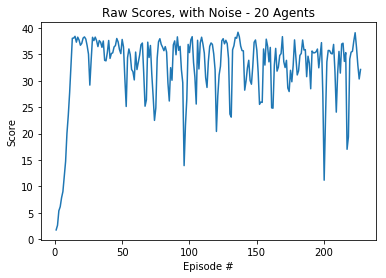

In [63]:
import pandas as pd


stdm=[average_global[i]-np.std(scores_global[i-20:i+3]) for i in range(len(scores_global))]
stdp=[average_global[i]+np.std(scores_global[i-20:i+3]) for i in range(len(scores_global))]

plt.plot(np.arange(1, len(scores_global)+1), average_global,color='black',label='avg score')
plt.plot(np.arange(1, len(scores_global)+1), stdm,color='green',label='+/- std dev')
plt.plot(np.arange(1, len(scores_global)+1), stdp,color='green')
plt.fill_between(range(len(scores_global)),
                 stdm,
                 stdp,
                 color='green',alpha=0.1,interpolate=True)
plt.title("Average Score per episode - 20 Agents")
plt.axhline(y=30.0, color='r', linestyle='-')
plt.ylabel('Average Score (per episodes)')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.title("Raw Scores, with Noise - 20 Agents")
plt.plot(np.arange(1, len(scores_global)+1), scores_global)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()



## Run a trained network

- Runs the trained network for 100 episodes

In [51]:
import time
rscores_deque = deque(maxlen=average_period)
rscores_global = []
raverage_global = []

def run_agent(n_episodes=100):
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        prev_states=states
        agent.reset()
        rscores = np.zeros(num_agents)                          # initialize the score (for each agent)
        time.sleep(3)
        
        while(True):
            actions = agent.act(prev_states,states, add_noise=False)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if any episode finished
            prev_states = states
            states = next_states                               # roll over states to next time step
            rscores += rewards                                  # update the score (for each agent)            
            if np.any(dones):                                  # exit loop if episode finished
                break

        rscore = np.mean(rscores)
        rscores_deque.append(rscore)
        rscore_average = np.mean(rscores_deque)
        rscores_global.append(rscore)
        raverage_global.append(rscore_average)
        print("run score=",rscore," average=",rscore_average)
        
        
    return rscores_global,raverage_global

rscores,raverage=run_agent()
print("rscore=",rscores,raverage)


run score= 36.76949917813763  average= 36.76949917813763
run score= 37.62449915902689  average= 37.19699916858226
run score= 36.91349917491898  average= 37.1024991706945
run score= 35.49799920655787  average= 36.70137417966034
run score= 36.84049917655066  average= 36.7291991790384
run score= 36.82749917684123  average= 36.74558251200554
run score= 36.5574991828762  average= 36.71871346498706
run score= 36.038499194476756  average= 36.63368668117328
run score= 35.51999920606613  average= 36.509943628383596
run score= 36.810999177210036  average= 36.54004918326624
run score= 37.74599915631116  average= 36.649680998997596
run score= 36.86649917596951  average= 36.667749180411924
run score= 37.48499916214496  average= 36.730614563622154
run score= 37.3594991649501  average= 36.775534892288434
run score= 36.90849917503074  average= 36.784399177804595
run score= 35.65899920295924  average= 36.714061679376755
run score= 35.48099920693785  average= 36.641528592762704
run score= 36.45699918512

## Plot Trained Run Results for 100 Episodes

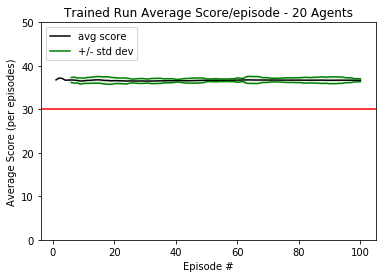

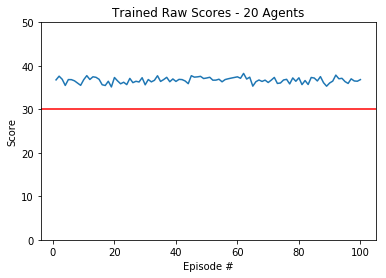

In [64]:
import pandas as pd


stdm=[raverage_global[i]-np.std(rscores_global[i-5:i+3]) for i in range(len(rscores_global))]
stdp=[raverage_global[i]+np.std(rscores_global[i-5:i+3]) for i in range(len(rscores_global))]

plt.plot(np.arange(1, len(rscores_global)+1), raverage_global,color='black',label='avg score')
plt.plot(np.arange(1, len(rscores_global)+1), stdm,color='green',label='+/- std dev')
plt.plot(np.arange(1, len(rscores_global)+1), stdp,color='green')
plt.ylim(0, 50)
plt.fill_between(range(len(rscores_global)),
                 stdm,
                 stdp,
                 color='green',alpha=0.1,interpolate=True)
plt.title("Trained Run Average Score/episode - 20 Agents")
plt.axhline(y=30.0, color='r', linestyle='-')
plt.ylabel('Average Score (per episodes)')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.ylim(0, 50)
plt.axhline(y=30.0, color='r', linestyle='-')
plt.title("Trained Raw Scores - 20 Agents")
plt.plot(np.arange(1, len(rscores_global)+1), rscores_global)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()